In [26]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [27]:
path = r'/Users/polinarozhkova/Desktop/GitHub/cr_eda_chicago/'
final_merge_df = pd.read_csv(os.path.join(path, 'clean_data/merge_all.csv'))
cr_reports = pd.read_excel(os.path.join(path, 'inputs/CR_from_CPD_Annual_Reports_copy.xlsx'))
foia_df = 'inputs/FOIA_2019_to_2021_Clearance_Rates_Shooting_Homicides.xlsx'
foia_hom = pd.read_excel((os.path.join(path, foia_df)), sheet_name=2)

In [28]:
cr_reports

,source,year,homicide_count,total_cleared,clearance_rate,firearm
0,CPD Annual Report for 2001,2000,631,335.0,0.530903,471
1,CPD Annual Report for 2001,2001,666,361.0,0.542042,514
2,CPD Annual Report for 2002,2002,648,301.0,0.464506,513
3,CPD Annual Report for 2003,2003,600,304.0,0.506667,485
4,CPD Annual Report for 2004,2004,448,234.0,0.522321,337
5,CPD Annual Report for 2005,2005,448,195.0,0.435268,339
6,CPD Annual Report for 2006,2006,467,181.0,0.387580,385
7,CPD Annual Report for 2007,2007,442,175.0,0.395928,325
8,CPD Annual Report for 2008,2008,510,181.0,0.354902,412
9,CPD Annual Report for 2009,2009,461,160.0,0.347072,376


### Plot 1

The number of homicides in data and number of homicides in the CPD annual reports don't always match
this may be because clearance rates are calculated using # of incidents rather than the number of victims.

In [29]:
def line_subplots(df, col_1, col_2, col_3, t_1, t_2, t_3):
    plt.rcParams.update({'font.size': 9})
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.set_style("darkgrid")
    ax.plot(df.year, col_1, label=t_1, color='gold')
    ax.plot(df.year, col_2, label=t_2, color='lightcoral')
    ax.plot(df.year, col_3, label=t_3, color='cornflowerblue')
    ax.legend(loc='best')
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_xticks(range(2001, 2022))
    ax.set_title('Trends in Homicide and Clearance Counts 2001-2021', fontsize=15)
    return

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


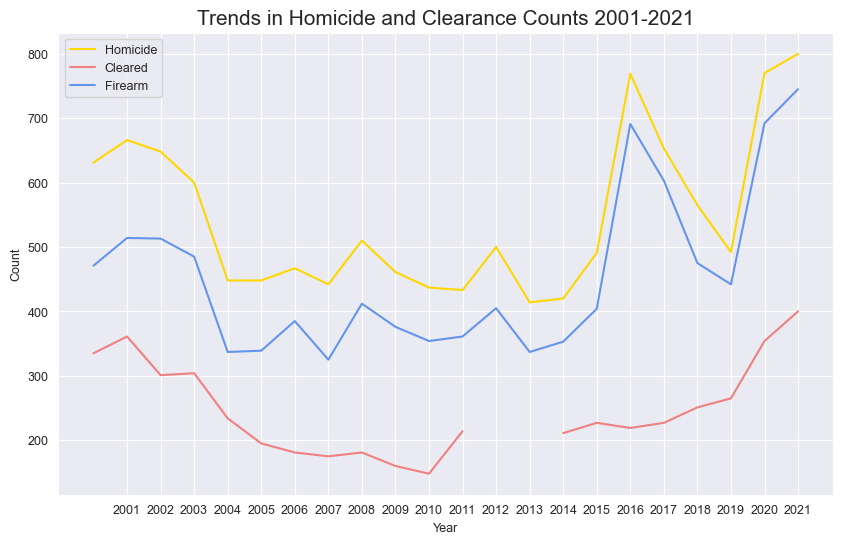

In [30]:
line_subplots(cr_reports, cr_reports.homicide_count, cr_reports.total_cleared,
              cr_reports.firearm, 'Homicide', 'Cleared', 'Firearm')
plt.savefig(os.path.join(path, 'plots/static_plot_2.eps'), format='eps', dpi=1000)

### Exceptional Clearances

In [ ]:
all_cleared_df = final_merge_df[final_merge_df['cleared'] == 'Y']

In [ ]:
foia_hom['year_clear'] = foia_hom['DATE CLEARED'].dt.year
foia_hom['year'] = foia_hom['INJURY DATE'].dt.year

hom_year_df = pd.DataFrame(
    foia_hom.groupby(['year_clear', 'year', 'CLEARED'])['RD'].count()).reset_index()

clear_year_df = pd.DataFrame(
    foia_hom.groupby(['year_clear', 'CLEARED'])['RD'].count()).reset_index()

except_clear_year = pd.DataFrame(
    foia_hom.groupby(['year_clear', 'CLEARED', 'CLEARED EXCEPTIONALLY'])
    ['RD'].count()).reset_index()

### Plot 2

In [7]:
yr_month_map = pd.DataFrame(final_merge_df.groupby(['year', 'month'])
                            ['case_number'].count()).reset_index()
yr_month_map = yr_month_map.rename(
    columns={'case_number': 'homicides'}).pivot('year', 'month', 'homicides')

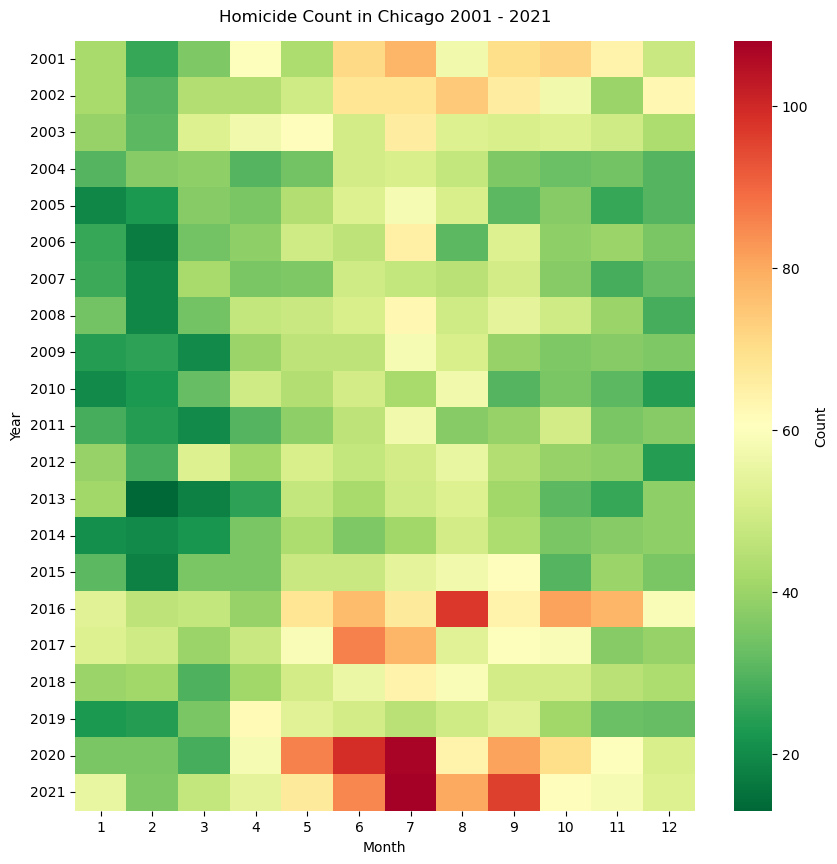

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(yr_month_map, cmap='RdYlGn_r',
            cbar_kws={'label': 'Count'})
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
ax.set_xlabel('Month')
ax.set_ylabel('Year')
plt.title('Homicide Count in Chicago 2001 - 2021', fontdict={'fontsize': 12}, pad=14)
plt.savefig(os.path.join(path, 'plots/static_plot_1.png'))

### Time to Clearance

In [ ]:
all_cleared_df['time_to_clear'].describe()

In [ ]:
all_cleared_df['time_to_clear'].sort_values()

Dropping incidents that were cleared immediately and likely administrative error of -17 days: 

In [ ]:
all_cleared_df = all_cleared_df[all_cleared_df['time_to_clear'] > 0]

In [ ]:
sns.histplot(data=all_cleared_df, x='time_to_clear', stat='count', bins='auto', cumulative=False)

In [ ]:
cleared_fem = all_cleared_df[all_cleared_df['sex'] == 'F']
cleared_fem

Sources:
For heatmap: https://seaborn.pydata.org/generated/seaborn.heatmap.html;
https://regenerativetoday.com/time-series-data-visualization-in-python/,
For annotations:
https://jessica-miles.medium.com/adding-annotations-to-visualizations-using-matplotlib-279e9c770baa
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html